# Challenge 1

## 1. Basics of Image and Signal Processing (LE1)

### 1.1. Image Properties

#### Day 1

Find or acquire 1-3 images related to your selected country Mexic0. The images should be suitable for demonstrating adjustments to image properties brightness and hue in experiments.

The pictures are from when i was living in Mexico.

repository at https://github.com/BR4GR/gbsv-challenges

code writen with the help of the Deep Dive repo chatgpt and opencv.org

In [1]:
import cv2 as cv
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import time as time1

from ipywidgets import interact, widgets
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, TextBox
from scipy.io.wavfile import write

jellyfish.shape=(3648, 5472, 3)
jellyfish.dtype=dtype('uint8')
np.max(jellyfish)=np.uint8(255)
np.min(jellyfish)=np.uint8(0)


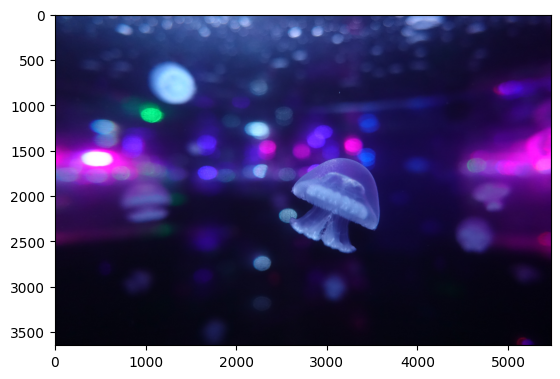

cavediving.shape=(3648, 5472, 3)
cavediving.dtype=dtype('uint8')
np.max(cavediving)=np.uint8(255)
np.min(cavediving)=np.uint8(0)


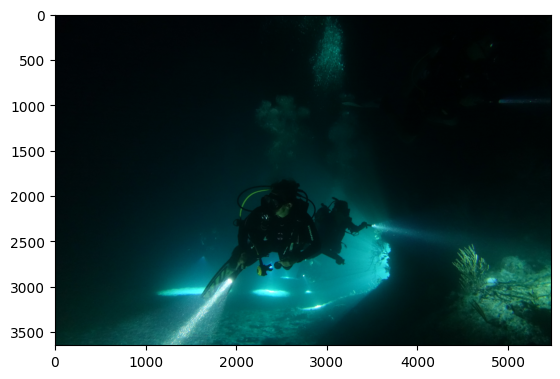

sunrise.shape=(4000, 6000, 3)
sunrise.dtype=dtype('uint8')
np.max(sunrise)=np.uint8(255)
np.min(sunrise)=np.uint8(0)


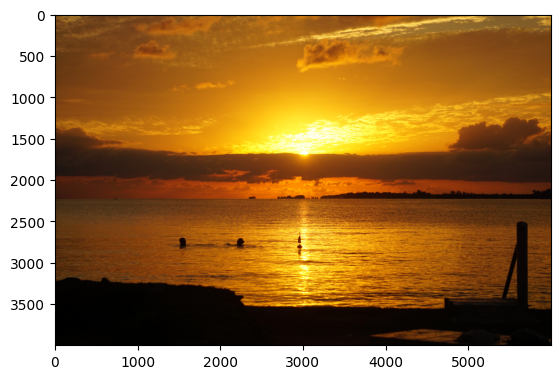

In [2]:
jellyfish = cv.imread('jellyfish.jpg')
print(f"{jellyfish.shape=}\n{jellyfish.dtype=}\n{np.max(jellyfish)=}\n{np.min(jellyfish)=}")
jellyfish = cv.cvtColor(jellyfish, cv.COLOR_BGR2RGB)

plt.imshow(jellyfish)
plt.show()

cavediving = cv.imread('cavediving.jpg')
print(f"{cavediving.shape=}\n{cavediving.dtype=}\n{np.max(cavediving)=}\n{np.min(cavediving)=}")
cavediving = cv.cvtColor(cavediving, cv.COLOR_BGR2RGB)

plt.imshow(cavediving)
plt.show()

sunrise = cv.imread('sunrise.jpg')
print(f"{sunrise.shape=}\n{sunrise.dtype=}\n{np.max(sunrise)=}\n{np.min(sunrise)=}")
sunrise = cv.cvtColor(sunrise, cv.COLOR_BGR2RGB)
plt.imshow(sunrise)
plt.show()

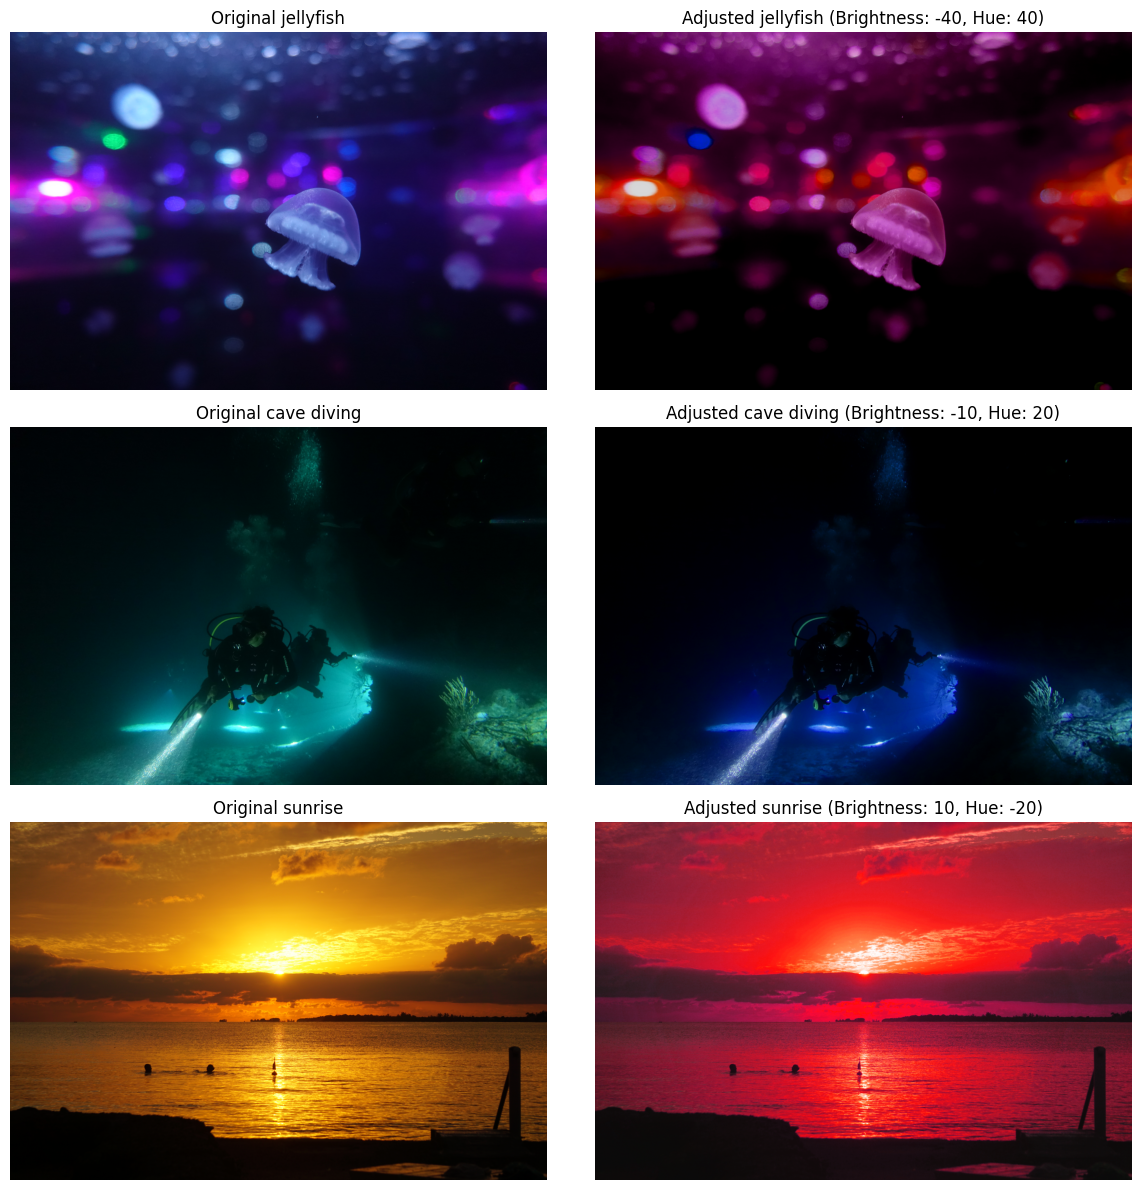

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to adjust brightness for an RGB image
def adjust_brightness(image, brightness=0):
    """
    Adjust the brightness of an RGB image.
    
    Parameters:
    - image: Input image in RGB format
    - brightness: Amount to adjust brightness (can be positive or negative)
    
    Returns:
    - Brightness-adjusted image
    """
    image = np.int16(image)
    image = image + brightness
    image = np.clip(image, 0, 255)  # Ensure values stay within [0, 255]
    return np.uint8(image)

# Function to adjust hue for an RGB image
def adjust_hue(image, hue_shift=0):
    """
    Adjust the hue of an RGB image.
    
    Parameters:
    - image: Input image in RGB format
    - hue_shift: Amount to shift the hue by (in degrees)
    
    Returns:
    - Hue-adjusted image
    """
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    hue = hsv_image[:, :, 0].astype(int)
    hue = (hue + hue_shift) % 180  # Ensure hue stays within the range [0, 179]
    hsv_image[:, :, 0] = hue.astype(np.uint8)
    return cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)

# Function to apply both brightness and hue adjustments
def apply_adjustments(image, brightness=0, hue_shift=0):
    bright_image = adjust_brightness(image, brightness)
    final_image = adjust_hue(bright_image, hue_shift)
    return final_image

# Function to display the original and adjusted images side by side
def display_images_side_by_side(image, brightness=0, hue_shift=0, ax=None, title="Image"):
    """
    Display the original and adjusted images side by side for comparison.
    
    Parameters:
    - image: The input image in RGB format
    - brightness: Amount to adjust brightness
    - hue_shift: Amount to shift the hue by
    """
    adjusted_image = apply_adjustments(image, brightness, hue_shift)
    
    # Original image
    ax[0].imshow(image)
    ax[0].set_title(f'Original {title}')
    ax[0].axis('off')
    
    # Adjusted image
    ax[1].imshow(adjusted_image)
    ax[1].set_title(f'Adjusted {title} (Brightness: {brightness}, Hue: {hue_shift})')
    ax[1].axis('off')

# Function to display all images side by side with fixed brightness and hue values
def display_all_images():
    # Fixed values for brightness and hue for each image
    brightness_jellyfish = -40
    hue_jellyfish = 40
    
    brightness_cave = -10
    hue_cave = 20
    
    brightness_sunrise = 10
    hue_sunrise = -20

    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    # jellyfish
    display_images_side_by_side(jellyfish, brightness_jellyfish, hue_jellyfish, axes[0], "jellyfish")
    
    # Cave Diving
    display_images_side_by_side(cavediving, brightness_cave, hue_cave, axes[1], "cave diving")
    
    # sunrise
    display_images_side_by_side(sunrise, brightness_sunrise, hue_sunrise, axes[2], "sunrise")
    
    plt.tight_layout()
    plt.savefig("adjusted_images2x3.png", dpi=300)
    plt.show()

# Display all images with fixed adjustments
display_all_images()


#### Day 2

Define a problem and use case related to your country profile (Steckbrief) for each assigned property that you intend to address (brightness and hue). Then define 1-2 experiments with objectives on how you want to address your defined problem and use case. Multiple experiments/objectives can be analyzed in one single image. Write concisely for each experiment: WHAT problem and use case do you address, HOW do you want to address/solve the problem for this specific use case, and WHY is your experiment helpful for the chosen use case?

#### Problem:
The jellyfish image was taken in a aquarium in playa del Carmen, the room was extreemly dark even thought it was full of different changing colorfull lights, which ilumnated the jelyfish. the image is too bright, and the variety of colors from the light show is not well represented. The dark room and colorful glowing effect of the jellyfish are lost due to overexposure. This results in the background becoming too visible and reduces the visual focus on the jellyfish, which were meant to glow against a dark backdrop.

#### Use Case:
Simulating the original light show where jellyfish glowed in different colors in a dark room. The objective is to recreate the low-light ambiance and simulate the various colors the jellyfish displayed during the light show using hue adjustments.

#### Objectives of the Experiments:
*Brightness Adjustment*:
Reduce the overall brightness to restore the dark environment, ensuring that the jellyfish glow remains the visual focus.
How: Lower the brightness to darken the background while keeping the jellyfish visible, mimicking the darkroom atmosphere.
we will test and compare different methodes of brightness ajustment, like gamma, region speciffic brightness, or clahe.


Hue Adjustment:*
Simulate the changing colors of the light show by adjusting the hue. This allows us to create the effect of different colored lights shining on the jellyfish, even though the image only shows one color.
How: Shift the hue to enhance the jellyfish’s glow and replicate the dynamic color changes seen during the light show.


#### Explanation, Why are these adjustments relevant?

Brightness: 
The dark room is an essential part of the jellyfish exhibit, where overexposure distorts the intended visual experience. Reducing brightness restores this intended ambiance.


Hue: 
The light show was dynamic and colorful, and adjusting the hue allows us to simulate the color transitions that were key to the experience. This makes the image more visually accurate and engaging.

#### Day 3 
Conduct part 1 of your experiments with your images and suitable methods. Reason your choice of parameters and methods using visualizations or 1-2 sentences emach.

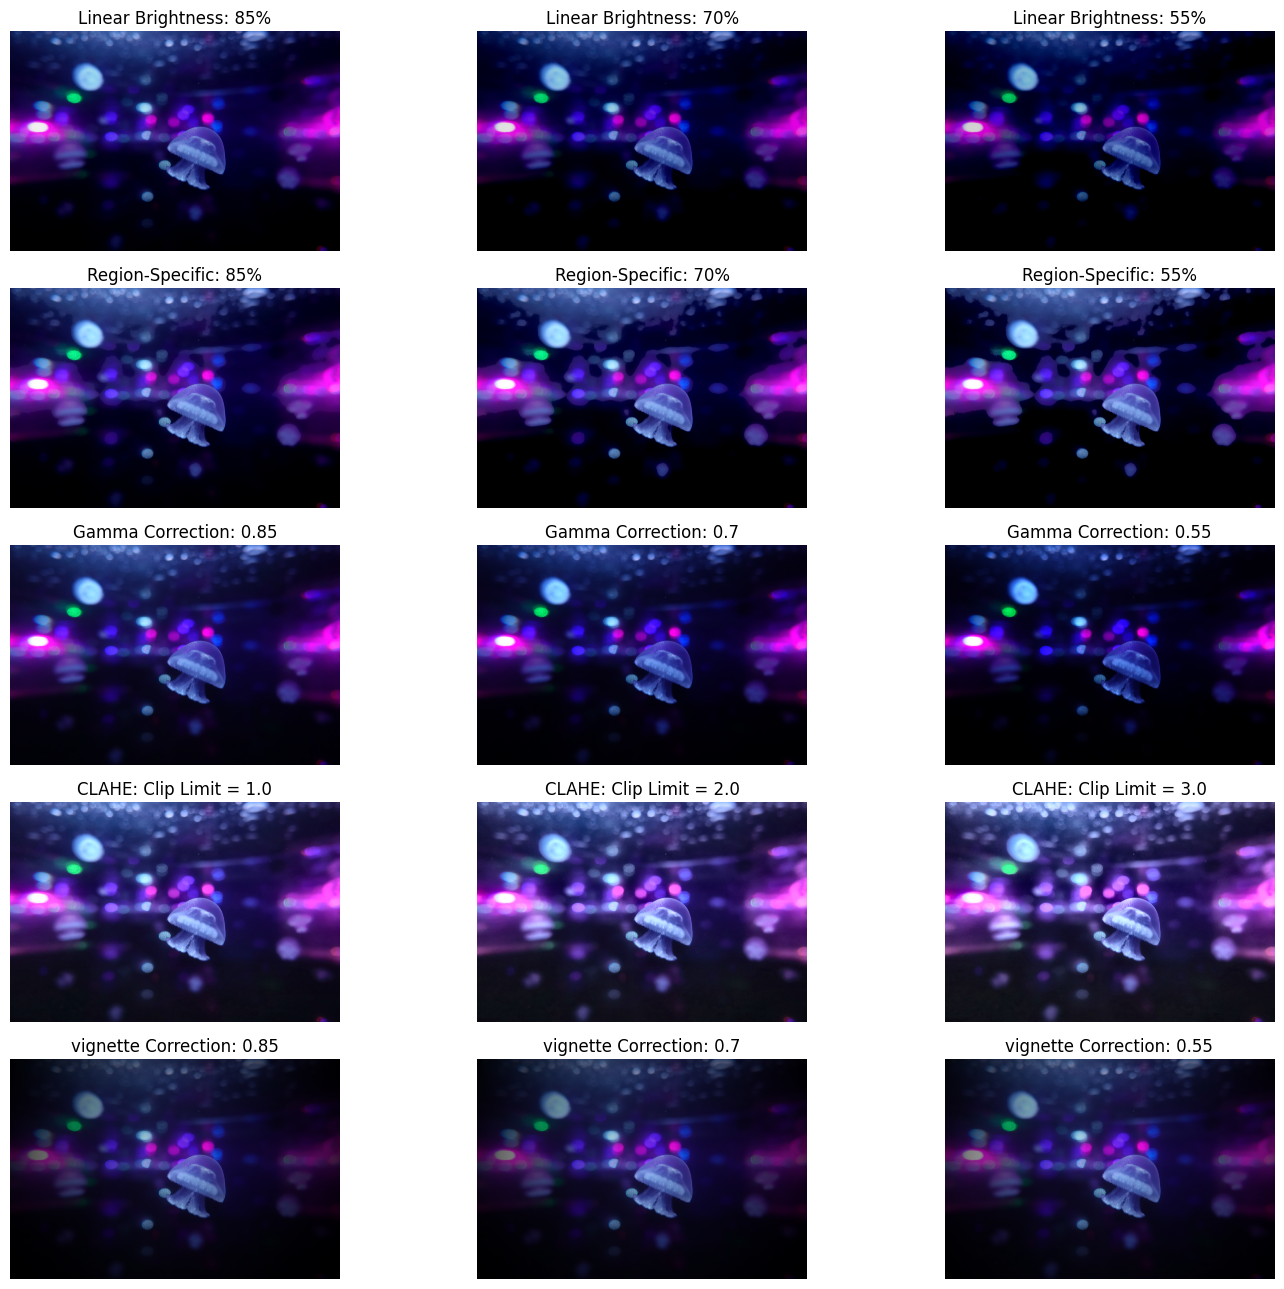

In [4]:
# Function to apply gamma correction
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Function to apply region-specific brightness adjustment (e.g., darkening background)
def apply_region_specific_brightness(image, brightness_value):
    mask = image[:, :, 2] < 100  # Apply brightness adjustment to the darker regions only
    brightened_image = adjust_brightness(image.copy(), brightness_value)
    image[mask] = brightened_image[mask]
    return image

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    lab_image = cv.cvtColor(image, cv.COLOR_RGB2LAB)
    clahe = cv.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])
    return cv.cvtColor(lab_image, cv.COLOR_LAB2RGB)


def apply_vignette(image, radius_factor=2, brightness_reduction=0.5):
    rows, cols = image.shape[:2]
    center_x, center_y = cols // 2, rows // 2
    # Create a Gaussian kernel that will serve as the vignette mask
    # Calculate the maximum possible radius
    max_radius = np.sqrt(center_x ** 2 + center_y ** 2) / radius_factor
    # Create meshgrid for the X and Y coordinates
    x = np.arange(cols)
    y = np.arange(rows)
    X, Y = np.meshgrid(x, y)
    # Calculate the distance from the center of the image
    distance_from_center = np.sqrt((X - center_x) ** 2 + (Y - center_y) ** 2)
    # Normalize the distances to a range between 0 and 1, then reverse (1 at center, 0 at edges)
    vignette_mask = np.clip(1 - (distance_from_center / max_radius), 0, 1)
    # Apply brightness reduction (e.g., 0.5 means reduce brightness by 50% at the edges)
    vignette_mask = vignette_mask ** brightness_reduction  # Adjust the strength of reduction
    # Apply the vignette mask to each channel (RGB)
    vignette_mask_3d = vignette_mask[:, :, np.newaxis]  # Make mask compatible with 3-channel image
    vignette_image = np.uint8(image * vignette_mask_3d)
    return vignette_image


# Experiment: Create three levels of brightness adjustment (80%, 60%, 40%)
brightness_levels = [-15, -30, -45]
gamma_values = [0.85, 0.7, 0.55]
vignette_values = [0.85, 0.7, 0.55]
clahe_clip_limits = [1.0, 2.0, 3.0]

# Create a 3x3 grid for each method and level of adjustment
fig, ax = plt.subplots(5, 3, figsize=(15, 13))

# Row 1: Linear brightness adjustment
for i, brightness in enumerate(brightness_levels):
    adjusted_image = adjust_brightness(jellyfish.copy(), brightness)
    ax[0, i].imshow(adjusted_image)
    ax[0, i].set_title(f'Linear Brightness: {100 + brightness}%')
    ax[0, i].axis('off')

# Row 3: Region-specific brightness adjustment
for i, brightness in enumerate(brightness_levels):
    region_adjusted_image = apply_region_specific_brightness(jellyfish.copy(), brightness)
    ax[1, i].imshow(region_adjusted_image)
    ax[1, i].set_title(f'Region-Specific: {100 + brightness}%')
    ax[1, i].axis('off')
    
# Row 2: Gamma correction
for i, gamma in enumerate(gamma_values):
    gamma_corrected_image = adjust_gamma(jellyfish.copy(), gamma)
    ax[2, i].imshow(gamma_corrected_image)
    ax[2, i].set_title(f'Gamma Correction: {gamma}')
    ax[2, i].axis('off')

# Row 4: CLAHE with different clip limits (strengths)
for i, clip_limit in enumerate(clahe_clip_limits):
    clahe_image = apply_clahe(jellyfish.copy(), clip_limit=clip_limit)
    ax[3, i].imshow(clahe_image)
    ax[3, i].set_title(f'CLAHE: Clip Limit = {clip_limit}')
    ax[3, i].axis('off')

# Row 1: Linear brightness adjustment
for i, brightness in enumerate(vignette_values):
    adjusted_image = apply_vignette(jellyfish.copy(), 1, brightness)
    ax[4, i].imshow(adjusted_image)
    ax[4, i].set_title(f'vignette Correction: {brightness}')
    ax[4, i].axis('off')


plt.tight_layout()
plt.savefig("brightnessexperiment.png", dpi=300)
plt.show()


#### Reasoning for Methods and Parameters:
*Gamma Correction* was chosen for its ability to apply non-linear adjustments, which better handles darkening shadows while preserving highlights, making it the best method for enhancing the contrast between the glowing jellyfish and the dark background.
*CLAHE* was chosen for localized contrast enhancement, particularly in low-contrast areas (background).
*Region-specific adjustments* were used to target specific areas like the background, maintaining the focus on the jellyfish.
*The vignette effect* was used as a creative approach to enhance the vintage feel and control the outer brightness.
Parameters were chosen by trial and error, using large and small stept untill a godd step size was found for each Method.

#### Observations:
The best result was achieved with Gamma Correction (0.55), which effectively darkened the background while preserving the vibrant, glowing jellyfish. The vignette effect added a vintage feel but wasn't the best fit for the goal of simulating the aquarium light show.


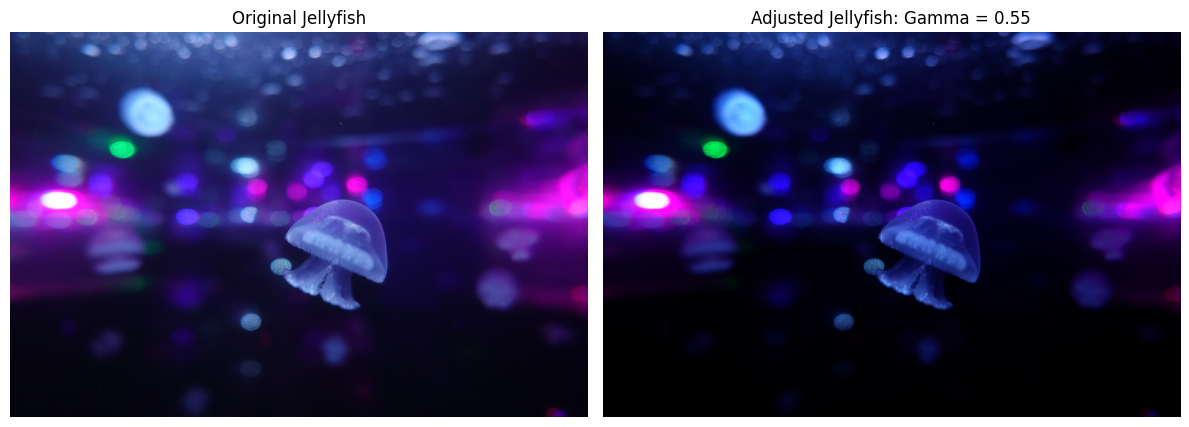

In [5]:
dark_adjusted_jellyfish = adjust_gamma(jellyfish.copy(), 0.55)

# Display the original and adjusted images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(jellyfish)
ax[0].set_title('Original Jellyfish')
ax[0].axis('off')

ax[1].imshow(dark_adjusted_jellyfish)
ax[1].set_title('Adjusted Jellyfish: Gamma = 0.55')
ax[1].axis('off')
cv.imwrite("dark_adjusted_jellyfish.png", cv.cvtColor(dark_adjusted_jellyfish, cv.COLOR_RGB2BGR))
plt.tight_layout()
plt.savefig("dark_adjusted_jellyfish_comparison.png", dpi=300)
plt.show()

#### Day 4 
Conduct part 2 of your experiments with your images and suitable methods. Reason your choice of parameters and methods using visualizations or 1-2 sentences each.

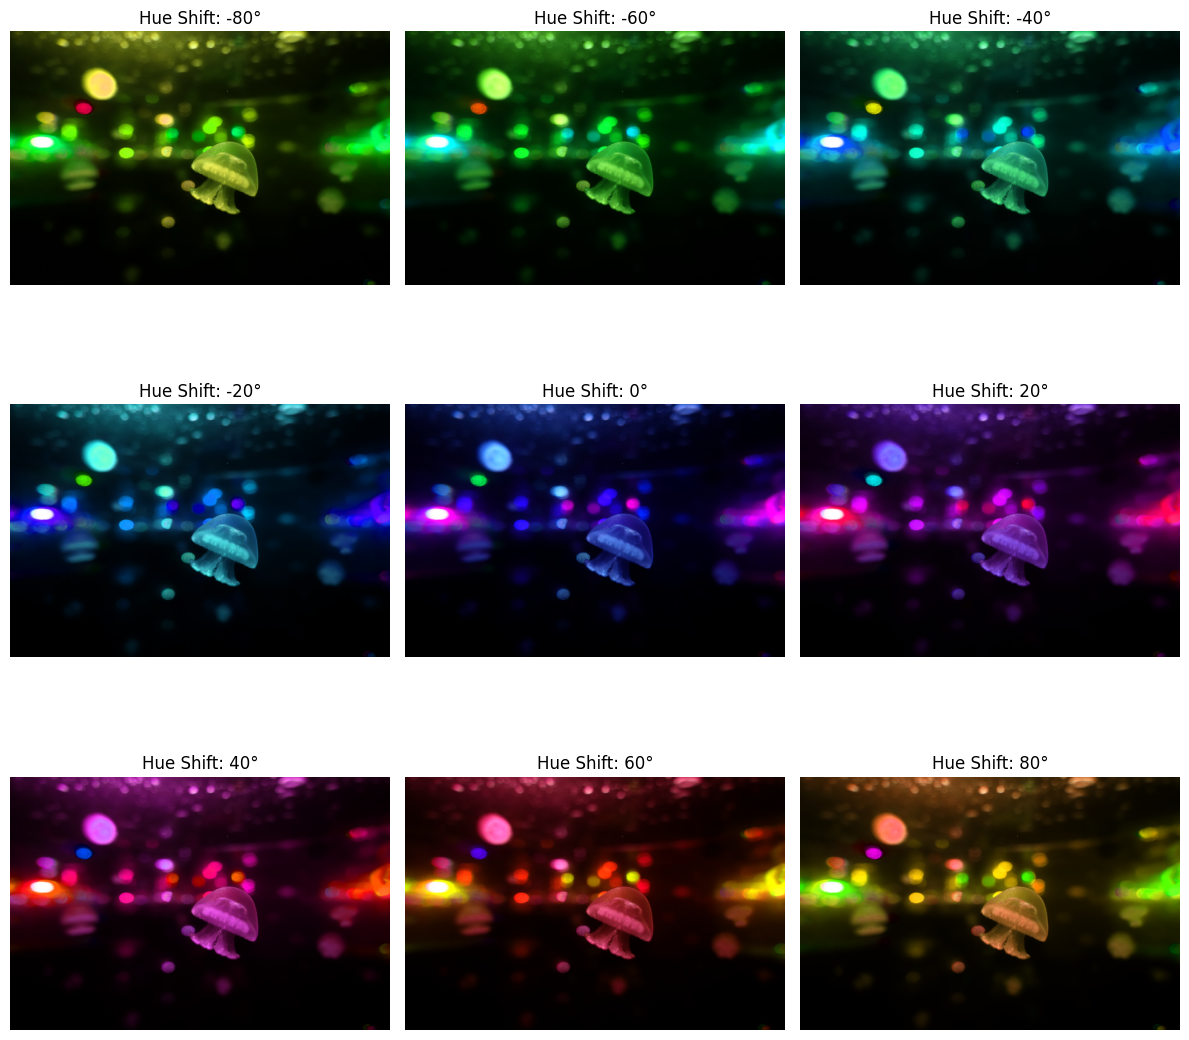

In [6]:
hue_shifts = [-80, -60, -40, -20, 0, 20, 40, 60, 80]

# Create a 3x3 grid for hue adjustments
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

for i, hue_shift in enumerate(hue_shifts):
    hue_adjusted_image = adjust_hue(dark_adjusted_jellyfish.copy(), hue_shift=hue_shift)
    
    row = i // 3
    col = i % 3
    
    ax[row, col].imshow(hue_adjusted_image)
    ax[row, col].set_title(f'Hue Shift: {hue_shift}°')
    ax[row, col].axis('off')

plt.tight_layout()
plt.savefig("hue_experiment.png", dpi=300)
plt.show()


In [7]:

# Apply hue shifts to different quadrants of the image
def apply_quadrant_hue_shifts(image, hue_shifts):
    # Define the quadrants
    #jellyfish.shape is (3648, 5472, 3)
    rowsplit = 2000
    columnsplit = 3150

    top_left = image[0:rowsplit, 0:columnsplit]
    top_right = image[0:rowsplit, columnsplit:]
    bottom_right = image[rowsplit:, columnsplit:]
    bottom_left = image[rowsplit:, 0:columnsplit]
    
    # Apply hue shifts to each quadrant
    top_left = adjust_hue(top_left, hue_shifts[0])
    top_right = adjust_hue(top_right, hue_shifts[1])
    bottom_right = adjust_hue(bottom_right, hue_shifts[2])
    bottom_left = adjust_hue(bottom_left, hue_shifts[3])
    
    # Reconstruct the full image with the adjusted quadrants
    top_half = np.hstack((top_left, top_right))
    bottom_half = np.hstack((bottom_left, bottom_right))
    adjusted_image = np.vstack((top_half, bottom_half))
    filename = f"quadrant_hue_shifts{hue_shifts[0]}_{hue_shifts[1]}_{hue_shifts[2]}_{hue_shifts[3]}.png"
    cv.imwrite(filename, cv.cvtColor(adjusted_image, cv.COLOR_RGB2BGR))
    print(f"Image saved as {filename}")

apply_quadrant_hue_shifts(dark_adjusted_jellyfish.copy(), [0, 40, 80, 120])
apply_quadrant_hue_shifts(dark_adjusted_jellyfish.copy(), [20, 60, 100, 140])

Image saved as quadrant_hue_shifts0_40_80_120.png
Image saved as quadrant_hue_shifts20_60_100_140.png


### awesome Image
![awesome Image](quadrant_hue_shifts0_40_80_120.png)

### awesome Image
![awesome Image](quadrant_hue_shifts20_60_100_140.png)


In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to apply smooth sliding hue shift from 0° to 180° across the image
def apply_smooth_sliding_hue_shift(image):
    """
    Apply a smooth sliding hue shift from 0° to 180° across the image, left to right.
    
    Parameters:
    - image: Input RGB image.
    
    Returns:
    - Image with a smooth sliding hue shift applied from left to right.
    """
    # Convert the image to HSV (Hue, Saturation, Value)
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    
    # Get the dimensions of the image
    cols = image.shape[1]
    
    # Create a sliding hue mask based on the column position
    for col in range(cols):
        # Compute the hue shift smoothly as a proportion of the column position
        hue_shift = int((col / cols) * 90)  # Scale hue shift between 0 and 180
        hsv_image[:, col, 0] = (hsv_image[:, col, 0] + hue_shift) % 180  # Apply the hue shift to the column
    # Convert back to RGB
    sliding_hue_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)
    
    return sliding_hue_image
# Apply smooth sliding hue shift from 0° to 180°
smooth_sliding_hue_image = apply_smooth_sliding_hue_shift(dark_adjusted_jellyfish.copy())
# Optionally, save the image
cv.imwrite("smooth_sliding_hue_shift_0_to_90.png", cv.cvtColor(smooth_sliding_hue_image, cv.COLOR_RGB2BGR))


True


![awesome Image](smooth_sliding_hue_shift_0_to_90.png)

#### Reasoning for Methods and Parameters:
The uniform hue shifts were chosen to clearly visualize how different color adjustments affect the overall image. This method allowed for a straightforward comparison of how each hue shift impacts the brightness and color of the jellyfish.

The quadrant-based hue shift and th sliding shift was chosen mostly to see what it looks like, and because the different effects are closer together without whitespaces in between. the parameters where chosen to display the biggest amont of differnt shifts, as there was not really atarget shift. in the show there where also all colors present.

#### Observations:
The results resemble the effect in real live better than i expected, it pretty much looks exactly how i remember it.
The gif looks way worse than expected and seems to have some problem with color tht i can't explain.


In [9]:

# Function to resize image to a smaller resolution
def resize_image(image, width=500):
    height = int(image.shape[0] * (width / image.shape[1]))  # Maintain aspect ratio
    return cv.resize(image, (width, height))

resized_image = resize_image(dark_adjusted_jellyfish.copy(), width=1000)

# Create frames for the GIF
def generate_hue_shift_frames(image, output_folder, num_frames=30):
    step = 180 // num_frames  # Define the hue step size
    frames = []
    
    for i in range(0, 180, step):
        hue_shifted_image = adjust_hue(image.copy(), i)
        frame_path = f"{output_folder}/frame_{i}.png"
        cv.imwrite(frame_path, cv.cvtColor(hue_shifted_image, cv.COLOR_RGB2BGR))  # Save frame
        frames.append(frame_path)
    
    return frames

# Generate frames for the resized image
frames = generate_hue_shift_frames(resized_image, output_folder='hue_frames', num_frames=60)

from PIL import Image
# Create a GIF from the saved frames
def create_gif(frames, output_path, duration=100):
    images = [Image.open(frame) for frame in frames]
    images[0].save(output_path, save_all=True, append_images=images[1:], duration=duration, loop=0)
    
# Create the GIF
create_gif(frames, output_path='hue_shift_animation.gif', duration=100)

# GIF

![Hue Shift Animation](hue_shift_animation.gif)


#### Day 5 
Measure your results using appropriate methods. Reason your choice of methods and parameters using visualizations or 1-2 sentences. Select specific measurement methods that are particularly suitable for your use case. Analyze the histograms of the original images and, if applicable, during your experiments.

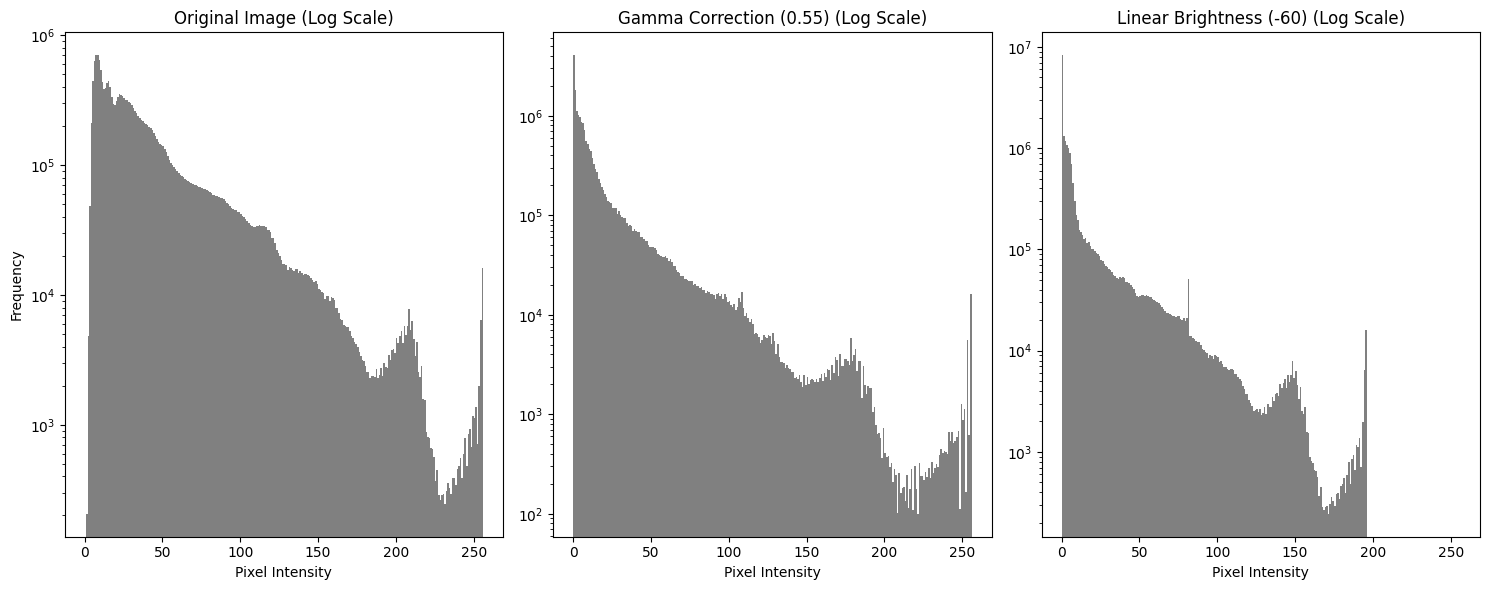

KPIs for the Original Image:
Mean: 39.41889767163935
Std Dev: 37.269260229864
Skewness: 1.9444142675661276
Dynamic Range: 254
Entropy: 6.587779365349093

KPIs for Gamma Correction (0.55):
Mean: 15.993016981988047
Std Dev: 27.93977790955635
Skewness: 3.5483630400647086
Dynamic Range: 255
Entropy: 5.137508582224073

KPIs for Linear Brightness (-60):
Mean: 11.016358849597953
Std Dev: 23.555591835182078
Skewness: 3.527971057920704
Dynamic Range: 195
Entropy: 4.078345291811171


In [10]:
from scipy.stats import skew
from skimage.measure import shannon_entropy

def adjust_brightness(image, brightness=0):
    image = np.int16(image)
    image = image + brightness
    image = np.clip(image, 0, 255)  # Ensure values stay within [0, 255]
    return np.uint8(image)

# Function to apply gamma correction
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Function to plot histograms for brightness adjustments for multiple methods
def plot_multiple_brightness_histograms_log(original_image, methods_dict):
    """
    Plots histograms for the original image and multiple brightness adjustment methods with a logarithmic scale.
    
    Parameters:
    - original_image: The original input image.
    - methods_dict: A dictionary where keys are method names and values are the corresponding adjusted images.
    """
    # Convert original to grayscale
    original_gray = cv.cvtColor(original_image, cv.COLOR_RGB2GRAY)
    
    # Number of methods + 1 for the original image
    num_methods = len(methods_dict)
    
    plt.figure(figsize=(15, 6))
    
    # Plot original image histogram (with log scale on y-axis)
    plt.subplot(1, num_methods + 1, 1)
    plt.hist(original_gray.ravel(), bins=256, range=(0, 256), color='gray')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title('Original Image (Log Scale)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    # Plot histograms for each method with log scale
    for i, (method_name, adjusted_image) in enumerate(methods_dict.items(), 2):
        adjusted_gray = cv.cvtColor(adjusted_image, cv.COLOR_RGB2GRAY)
        plt.subplot(1, num_methods + 1, i)
        plt.hist(adjusted_gray.ravel(), bins=256, range=(0, 256), color='gray')
        plt.yscale('log')  # Set y-axis to logarithmic scale
        plt.title(f'{method_name} (Log Scale)')
        plt.xlabel('Pixel Intensity')
    
    plt.tight_layout()
    plt.savefig("brightness_comparison_histograms_log.png", dpi=300)
    plt.show()

# Function to calculate KPIs for brightness (mean, median, std)
def calculate_brightness_kpis(image):
    gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    
    # Selected KPIs
    mean = np.mean(gray_image)
    std_dev = np.std(gray_image)
    skewness = skew(gray_image.ravel())
    dynamic_range = np.max(gray_image) - np.min(gray_image)
    entropy = shannon_entropy(gray_image)
    
    return {
        "Mean": mean,
        "Std Dev": std_dev,
        "Skewness": skewness,
        "Dynamic Range": dynamic_range,
        "Entropy": entropy
    }

# Function to calculate KPIs for multiple methods
def compare_brightness_kpis(original_image, methods_dict):
    print("KPIs for the Original Image:")
    original_kpis = calculate_brightness_kpis(original_image)
    for kpi_name, value in original_kpis.items():
        print(f"{kpi_name}: {value}")

    for method_name, adjusted_image in methods_dict.items():
        print(f"\nKPIs for {method_name}:")
        adjusted_kpis = calculate_brightness_kpis(adjusted_image)
        for kpi_name, value in adjusted_kpis.items():
            print(f"{kpi_name}: {value}")


# Example images: original and two different brightness-adjusted methods
original_image = jellyfish.copy()

# Apply different adjustments
gamma_fish = adjust_gamma(original_image.copy(), gamma=0.55)  # Gamma correction
cv.imwrite("gamma_fish.png", cv.cvtColor(gamma_fish, cv.COLOR_RGB2BGR))
dark_fish = adjust_brightness(original_image.copy(), brightness=-60)  # Linear brightness adjustment
cv.imwrite("dark_fish.png", cv.cvtColor(dark_fish, cv.COLOR_RGB2BGR))



# Step 1: Plot histograms for multiple methods
methods_dict = {
    "Gamma Correction (0.55)": gamma_fish,
    "Linear Brightness (-60)": dark_fish
}

plot_multiple_brightness_histograms_log(original_image, methods_dict)

# Step 2: Compare KPIs for multiple methods
compare_brightness_kpis(original_image, methods_dict)


### Gamma (0.55) 
![awesome Image](gamma_fish.png)

### Linear Brightness (-60)
![awesome Image](dark_fish.png)

Why the metrics were chosen:
The selected metrics directly address the use case of analyzing brightness adjustments. By using these metrics, we can quantitatively determine how the two adjustment methods (gamma correction and linear brightness adjustment) differ in terms of their effects on the image.
Mean and standard deviation were chosen as basic indicators of brightness and contrast.
Skewness was chosen to see whether the adjustments cause the image to become more biased towards darker or lighter regions.
Dynamic Range was selected to quantify how much detail remains after adjustment.
Entropy was chosen to measure how much image information and texture is preserved.

Why specific parameters were chosen:
Gamma (0.55) was chosen because it darkens the mid-tones more than the highlights or shadows, which is suitable for the jellyfish image where we want to keep glowing areas intact while darkening the background.
Linear Brightness (-60) was chosen to uniformly darken the image, providing a straightforward comparison with the more complex gamma adjustment.
Both parameters were found by trial and error.
